In [1]:
import os
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torch.autograd import Variable
from torchvision.utils import save_image
import torch.nn.functional as F
from PIL import Image
import pandas as pd
import cv2
# import matplotlib as plt
from matplotlib import pyplot as plt
from collections import Counter
import gtsrbData
import mnistData


# class customDataset(Dataset):
#     def __init__(self, annotations, img_dir, flag="train", transform=None, target_transform=None):
#         # super().__init__()
#         assert flag in ["train", "test"]
#         self.flag = flag

#         self.image_labels = pd.read_csv(annotations)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.image_labels)
    
#     def __getitem__(self, index):
#         img_path = os.path.join(self.img_dir, self.image_labels.iloc[index, 0])
#         # print(img_path)
#         image = Image.fromarray(cv2.imread(img_path, -1), mode="L")
#         label = self.image_labels.iloc[index, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, int(label)    

transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.3403, 0.3121, 0.3214),
                            (0.2724, 0.2608, 0.2669))
    ])


def activation_data(model, input, output):
    print("+++++++++++++++++++++++++++++++")

    A = output[0].cpu().detach().numpy()

    plt.title("The activation")
    plt.xlabel("index")
    plt.ylabel("value")
    X, = plt.plot(A)
    plt.legend([X], ["Activation"])
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.show()
    

device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu")


# models
MNISTPoisonedModel = mnistData.NeuralNetwork().to(device)
MNISTPoisonedModel.load_state_dict(torch.load("./model/MNIST_poisoned.pth"))
MNISTCleanModel = mnistData.NeuralNetwork().to(device)
MNISTCleanModel.load_state_dict(torch.load("./model/MNIST_para.pth"))
GTSRBPoisonedModel = gtsrbData.NeuralNetwork().to(device)
GTSRBPoisonedModel.load_state_dict(torch.load("./model/GTSRB_poisoned.pth"))
GTSRBCleanModel = gtsrbData.NeuralNetwork().to(device)
GTSRBCleanModel.load_state_dict(torch.load("./model/GTSRB_para.pth"))

# MNIST data
noiseData= mnistData.customDataset(annotations="data/noise/label.csv", img_dir="data/noise/img", transform=transforms.ToTensor(), flag="test")
MNISTNoiseData = DataLoader(dataset=noiseData, batch_size=1, shuffle=True)
test_dataset = datasets.MNIST(root="data/", train=False, transform=transforms.ToTensor(), download=True)
MNISTCleanData = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
testData= mnistData.customDataset(annotations="data/PoisonedMNIST/label.csv", img_dir="data/PoisonedMNIST/img", transform=transforms.ToTensor(), flag="train")
MNISTPoisonedData = DataLoader(dataset=testData, batch_size=1, shuffle=True)

# GTSRB data
noiseData= gtsrbData.customDataset(annotations="data/noise/label3.csv", img_dir="data/noise/img3", transform=transform, flag="test")
GTSRBNoiseData = DataLoader(dataset=noiseData, batch_size=1, shuffle=True)
test_dataset = datasets.GTSRB(root="data/", split="test", transform=transform, download=True)
GTSRBCleanData = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
testData= gtsrbData.customDataset(annotations="data/PoisonedGTSRB/label.csv", img_dir="data/PoisonedGTSRB/img", transform=transform, flag="test")
GTSRBPoisonedData = DataLoader(dataset=testData, batch_size=1, shuffle=True)

torch.no_grad()
MNISTPoisonedModel.eval()
MNISTCleanModel.eval()
GTSRBPoisonedModel.eval()
GTSRBCleanModel.eval()

global maxList
maxList = []

def get_max(model, input, output):
    A = output[0].cpu().detach().numpy()
    maxList.append(np.argmax(A))


global activationData

activationData = []

def activation_data_cov(model, input, output):
    print("+++++++++++++++++++++++++++++++")

    A = output[0].cpu().detach().numpy()
    A = A.ravel()

    activationData.append(A)

    # plt.title("The activation")
    # plt.xlabel("index")
    # plt.ylabel("value")
    # X, = plt.plot(A)
    # plt.legend([X], ["Activation"])
    # plt.rcParams["figure.figsize"] = (20, 10)
    # plt.show()


def show_image():
    plt.figure(figsize=(20, 10))
    plt.figure(1)
    # plt.title("The activation")
    # plt.xlabel("index")
    # plt.ylabel("value")

    ax1 = plt.subplot(211)
    ax1.set_title("The argmax(ReLU) of poisoned model")
    ax1.set_xlabel("index")
    ax1.set_ylabel("value")
    X, = ax1.plot(activationData[0])
    ax1.legend([X], ["Activation"])

    ax2 = plt.subplot(212)
    ax2.set_title("The argmax(ReLU) of clean model")
    ax2.set_xlabel("index")
    ax2.set_ylabel("value")
    Y, = ax2.plot(activationData[1])
    ax2.legend([Y], ["Activation"])

    plt.show()


def get_max_cov(model, input, output):
    A = output[0].cpu().detach().numpy()
    # A = A.ravel()
    maxList.append(np.max(A))


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torch.autograd import Variable
from torchvision.utils import save_image
import torch.nn.functional as F
from PIL import Image
import pandas as pd
import cv2
# import matplotlib as plt
from matplotlib import pyplot as plt
from collections import Counter
import gtsrbData
import mnistData


# class customDataset(Dataset):
#     def __init__(self, annotations, img_dir, flag="train", transform=None, target_transform=None):
#         # super().__init__()
#         assert flag in ["train", "test"]
#         self.flag = flag

#         self.image_labels = pd.read_csv(annotations)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.image_labels)
    
#     def __getitem__(self, index):
#         img_path = os.path.join(self.img_dir, self.image_labels.iloc[index, 0])
#         # print(img_path)
#         image = Image.fromarray(cv2.imread(img_path, -1), mode="L")
#         label = self.image_labels.iloc[index, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, int(label)    

transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.3403, 0.3121, 0.3214),
                            (0.2724, 0.2608, 0.2669))
    ])


def activation_data(model, input, output):
    print("+++++++++++++++++++++++++++++++")

    A = output[0].cpu().detach().numpy()

    plt.title("The activation")
    plt.xlabel("index")
    plt.ylabel("value")
    X, = plt.plot(A)
    plt.legend([X], ["Activation"])
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.show()
    

device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu")


# models
MNISTPoisonedModel = mnistData.NeuralNetwork().to(device)
MNISTPoisonedModel.load_state_dict(torch.load("./model/MNIST_poisoned.pth"))
MNISTCleanModel = mnistData.NeuralNetwork().to(device)
MNISTCleanModel.load_state_dict(torch.load("./model/MNIST_para.pth"))
GTSRBPoisonedModel = gtsrbData.NeuralNetwork().to(device)
GTSRBPoisonedModel.load_state_dict(torch.load("./model/GTSRB_poisoned.pth"))
GTSRBCleanModel = gtsrbData.NeuralNetwork().to(device)
GTSRBCleanModel.load_state_dict(torch.load("./model/GTSRB_para.pth"))

# MNIST data
noiseData= mnistData.customDataset(annotations="data/noise/label.csv", img_dir="data/noise/img", transform=transforms.ToTensor(), flag="test")
MNISTNoiseData = DataLoader(dataset=noiseData, batch_size=1, shuffle=True)
test_dataset = datasets.MNIST(root="data/", train=False, transform=transforms.ToTensor(), download=True)
MNISTCleanData = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
testData= mnistData.customDataset(annotations="data/PoisonedMNIST/label.csv", img_dir="data/PoisonedMNIST/img", transform=transforms.ToTensor(), flag="train")
MNISTPoisonedData = DataLoader(dataset=testData, batch_size=1, shuffle=True)

# GTSRB data
noiseData= gtsrbData.customDataset(annotations="data/noise/label3.csv", img_dir="data/noise/img3", transform=transform, flag="test")
GTSRBNoiseData = DataLoader(dataset=noiseData, batch_size=1, shuffle=True)
test_dataset = datasets.GTSRB(root="data/", split="test", transform=transform, download=True)
GTSRBCleanData = DataLoader(dataset=test_dataset, batch_size=1, shuffle=True)
testData= gtsrbData.customDataset(annotations="data/PoisonedGTSRB/label.csv", img_dir="data/PoisonedGTSRB/img", transform=transform, flag="test")
GTSRBPoisonedData = DataLoader(dataset=testData, batch_size=1, shuffle=True)

torch.no_grad()
MNISTPoisonedModel.eval()
MNISTCleanModel.eval()
GTSRBPoisonedModel.eval()
GTSRBCleanModel.eval()

global maxList
maxList = []

def get_max(model, input, output):
    A = output[0].cpu().detach().numpy()
    maxList.append(np.argmax(A))


global activationData

activationData = []

def activation_data_cov(model, input, output):
    print("+++++++++++++++++++++++++++++++")

    A = output[0].cpu().detach().numpy()
    A = A.ravel()

    activationData.append(A)

    # plt.title("The activation")
    # plt.xlabel("index")
    # plt.ylabel("value")
    # X, = plt.plot(A)
    # plt.legend([X], ["Activation"])
    # plt.rcParams["figure.figsize"] = (20, 10)
    # plt.show()


def show_image():
    plt.figure(figsize=(20, 10))
    plt.figure(1)
    # plt.title("The activation")
    # plt.xlabel("index")
    # plt.ylabel("value")

    ax1 = plt.subplot(211)
    ax1.set_title("The argmax(ReLU) of poisoned model")
    ax1.set_xlabel("index")
    ax1.set_ylabel("value")
    X, = ax1.plot(activationData[0])
    ax1.legend([X], ["Activation"])

    ax2 = plt.subplot(212)
    ax2.set_title("The argmax(ReLU) of clean model")
    ax2.set_xlabel("index")
    ax2.set_ylabel("value")
    Y, = ax2.plot(activationData[1])
    ax2.legend([Y], ["Activation"])

    plt.show()


def get_max_cov(model, input, output):
    A = output[0].cpu().detach().numpy()
    # A = A.ravel()
    maxList.append(np.max(A))


In [2]:
# handle = MNISTPoisonedModel.dense[1].register_forward_hook(activation_data)
# x = 0

# for i, y in MNISTPoisonedData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
#     if x >= 5:
#         break
# handle.remove()

In [3]:
# handle = MNISTPoisonedModel.dense[1].register_forward_hook(activation_data)
# x = 0

# for i, y in MNISTCleanData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
#     if x >= 5:
#         break
# handle.remove()

In [4]:
# maxList = []

# handle = MNISTPoisonedModel.dense[1].register_forward_hook(get_max)
# x = 0

# for i, y in MNISTPoisonedData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
# handle.remove()

# print(len(maxList))
# result = Counter(maxList)
# print(result)


# dic = {number: value for number, value in result.items()}
# x = [i for i in dic.keys()]
# y = []

# for i in dic.keys():
#     y.append(dic.get(i))

# df1 = pd.DataFrame(y, x)

# df1.plot(kind='bar', title="The highest value index of the output by last ReLU() -- Poisoned test data to poisoned model", xlabel="index", ylabel="number")

In [2]:
# maxList = []

# handle = MNISTPoisonedModel.dense[1].register_forward_hook(get_max)
# x = 0

# for i, y in MNISTCleanData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
#     if x > 606:
#         break
# handle.remove()

# result = Counter(maxList)
# print(result)

# dic = {number: value for number, value in result.items()}

# x = [i for i in dic.keys()]
# y = []

# for i in dic.keys():
#     y.append(dic.get(i))

# df2 = pd.DataFrame(y, x)

# df2.plot(kind='bar', title="The highest value index of the output by last ReLU() -- Clean test data to poisoned model", xlabel="number", ylabel="index")

In [6]:
# maxList = []

# handle = MNISTCleanModel.dense[1].register_forward_hook(get_max)
# x = 0

# for i, y in MNISTPoisonedData:
#     x += 1
#     i = i.to(device)
#     output = MNISTCleanModel(i)
# handle.remove()

# result = Counter(maxList)
# print(result)


# dic = {number: value for number, value in result.items()}

# x = [i for i in dic.keys()]
# y = []

# for i in dic.keys():
#     y.append(dic.get(i))

# df3 = pd.DataFrame(y, x)

# df3.plot(kind='bar', title="The highest value index of the output by last ReLU() -- Poisoned test data to clean model", xlabel="number", ylabel="index")

In [7]:
# maxList = []

# handle = MNISTCleanModel.dense[1].register_forward_hook(get_max)
# x = 0

# for i, y in MNISTCleanData:
#     x += 1
#     i = i.to(device)
#     output = MNISTCleanModel(i)
#     if x > 606:
#         break
# handle.remove()

# result = Counter(maxList)
# print(result)


# dic = {number: value for number, value in result.items()}

# x = [i for i in dic.keys()]
# y = []

# for i in dic.keys():
#     y.append(dic.get(i))

# df3 = pd.DataFrame(y, x)

# df3.plot(kind='bar', title="The highest value index of the output by last ReLU() -- Clean test data to clean model", xlabel="number", ylabel="index")

***What I got from above***

*1*. It can easily found the different/irregular when using poisoned test data and clean test data to test poisoned model(More obvious than DeepGini).

*2*. Compare Figure set{1,3} with {2,4}, The maximum Activation function output of Clean dataset is more discrete than poisoned dataset(CTC>CTP>PTC>PTP).

<br/>

***What is the problem***

*1*. Same with Gini index. If there is no additional work, it still need poisoned dataset (images contain trigger) to test the model to achieve clear distinction (shown in Figure 1 and 3).

*2*. The different is not that clear when using clean dataset to test both poisoned and clean model.

*notice*. Additionally, I think because of for MNIST, I only use ReLU to activate. The negative value of input is been ignored XD.
<br/>

***What next***

*1*. I think this is a feasible way. For next I will try to overcome the above problems and limitations, increase the practicality.

$\qquad$-- Existing work like VPN and Neural Cleanse.

$\qquad$-- Some math method can enlarge the difference.

*2*. More experiments, Find some useful informations/rules in the process.

*3*. Start planning to write a report (If have good progress next week)


In [8]:
# handle = MNISTPoisonedModel.conv1[1].register_forward_hook(activation_data_cov)
# handle_standard = MNISTCleanModel.conv1[1].register_forward_hook(activation_data_cov)
# x = 0

# for i, y in MNISTCleanData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
#     output_standard = MNISTCleanModel(i)
#     show_image()
#     activationData = []
#     if x >= 1:
#         break
# handle.remove()
# handle_standard.remove()

In [9]:
# maxList = []

# handle = MNISTPoisonedModel.conv1[1].register_forward_hook(get_max_cov)
# handle_standard = MNISTCleanModel.conv1[1].register_forward_hook(get_max_cov)
# x = 0

# for i, y in MNISTCleanData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
#     output_standard = MNISTCleanModel(i)
#     if x >= 200:
#         break

# label = np.arange(len(maxList)/2)
# poisoned_max = []
# standard_max = []
# for a in range(len(maxList)):
#     if a % 2 == 0:
#         poisoned_max.append(maxList[a])
#     else:
#         standard_max.append(maxList[a])


# plt.plot(label, poisoned_max, label="poisoned_max")
# plt.plot(label, standard_max, label="standard_max")

# plt.title("The maximum of the matrix which outputted by first ReLU() in poisoned/clean model")
# plt.xticks(label)
# plt.rcParams["figure.figsize"] = (20, 10)
# plt.legend()
# plt.show()


# #++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# number_of_means = 100

# poisoned_mean = []
# standard_mean = []
# for j in range(number_of_means):
#     maxList = []
#     x = 0
#     for i, y in MNISTCleanData:
#         x += 1
#         i = i.to(device)
#         output = MNISTPoisonedModel(i)
#         output_standard = MNISTCleanModel(i)
#         if x >= 5:
#             break
#     label = np.arange(number_of_means)
#     poisoned_max = []
#     standard_max = []
#     for a in range(len(maxList)):
#         if a % 2 == 0:
#             poisoned_max.append(maxList[a])
#         else:
#             standard_max.append(maxList[a])
    
#     poisoned_mean.append(np.mean(poisoned_max))
#     standard_mean.append(np.mean(standard_max))

# handle.remove()
# handle_standard.remove()

# plt.plot(label, poisoned_mean, label="poisoned_mean")
# plt.plot(label, standard_mean, label="standard_mean")

# plt.title("The mean(maximum) of the matrix which outputted by first ReLU() in poisoned/clean model")
# plt.xticks(label)
# plt.rcParams["figure.figsize"] = (20, 10)
# plt.legend()
# plt.show()


# percentage = []

# for i in range(len(poisoned_mean)):
#     percentage.append(poisoned_mean[i]/standard_mean[i])

# plt.plot(label, percentage, label="percentage")
# plt.axhline(y=1, color='r', linestyle='-')
# plt.title("Percent increase in average maximum value")
# plt.xticks(label)
# plt.rcParams["figure.figsize"] = (20, 10)
# plt.legend()



In [10]:
# maxList = []

# handle = MNISTPoisonedModel.conv1[1].register_forward_hook(get_max_cov)
# handle_standard = MNISTCleanModel.conv1[1].register_forward_hook(get_max_cov)
# x = 0

# for i, y in MNISTPoisonedData:
#     x += 1
#     i = i.to(device)
#     output = MNISTPoisonedModel(i)
#     output_standard = MNISTCleanModel(i)
#     if x >= 200:
#         break

# print(maxList)

# label = np.arange(len(maxList)/2)
# poisoned_max = []
# standard_max = []
# for a in range(len(maxList)):
#     if a % 2 == 0:
#         poisoned_max.append(maxList[a])
#     else:
#         standard_max.append(maxList[a])



# plt.plot(label, poisoned_max, label="poisoned_max")
# plt.plot(label, standard_max, label="standard_max")

# plt.title("The maximum of the matrix which outputted by first ReLU() in poisoned/clean model(Using triggered image)")
# plt.xticks(label)
# plt.rcParams["figure.figsize"] = (20, 10)
# plt.legend()
# plt.show()

# number_of_means = 100

# poisoned_mean = []
# standard_mean = []
# for j in range(number_of_means):
#     maxList = []
#     x = 0
#     for i, y in MNISTPoisonedData:
#         x += 1
#         i = i.to(device)
#         output = MNISTPoisonedModel(i)
#         output_standard = MNISTCleanModel(i)
#         if x >= 5:
#             break
#     label = np.arange(number_of_means)
#     poisoned_max = []
#     standard_max = []
#     for a in range(len(maxList)):
#         if a % 2 == 0:
#             poisoned_max.append(maxList[a])
#         else:
#             standard_max.append(maxList[a])
    
#     poisoned_mean.append(np.mean(poisoned_max))
#     standard_mean.append(np.mean(standard_max))

# handle.remove()
# handle_standard.remove()

# plt.plot(label, poisoned_mean, label="poisoned_mean")
# plt.plot(label, standard_mean, label="standard_mean")


# plt.title("The mean(maximum) of the matrix which outputted by first ReLU() in poisoned/clean model(Using triggered image)")
# plt.xticks(label)
# plt.rcParams["figure.figsize"] = (20, 10)
# plt.legend()
# plt.show()

[0.75406677, 0.7407801, 0.72773075, 0.7381872, 0.79571193, 0.79963446, 0.8205713, 0.7143533, 0.8515347, 0.79514635, 0.777639, 0.77638435, 0.93393654, 0.853449, 0.7731201, 0.8692882, 0.87034273, 0.9073217, 0.85574114, 0.78981346, 0.72321343, 0.7282237, 0.7788322, 0.8986379, 0.9197583, 0.7974966, 0.96675766, 0.8257468, 0.7707594, 0.76395607, 0.79595697, 0.7856101, 0.88684845, 0.8551826, 0.8583295, 0.7915582, 0.7458118, 0.7600541, 0.75227404, 0.7453171, 0.79424244, 0.76859194, 0.8695054, 0.75595075, 0.9300049, 0.7464858, 0.8235694, 0.7904106, 0.84940326, 0.83982193, 0.9127065, 0.82690626, 0.7649244, 0.8957149, 0.85208845, 0.78312963, 0.80628526, 0.7296779, 0.8257003, 0.8446469, 0.8681207, 0.8411214, 0.82254857, 0.75598216, 0.86561954, 0.9123182, 0.78084254, 0.70405746, 0.91108215, 0.850022, 0.92139405, 0.7939335, 0.84112, 0.80579615, 0.8054374, 0.758537, 0.8133456, 0.8748092, 0.74744403, 0.863501, 0.7861667, 0.7802271, 0.77606565, 0.84534395, 0.83925974, 0.747324, 0.888447, 0.7283285, 0.8

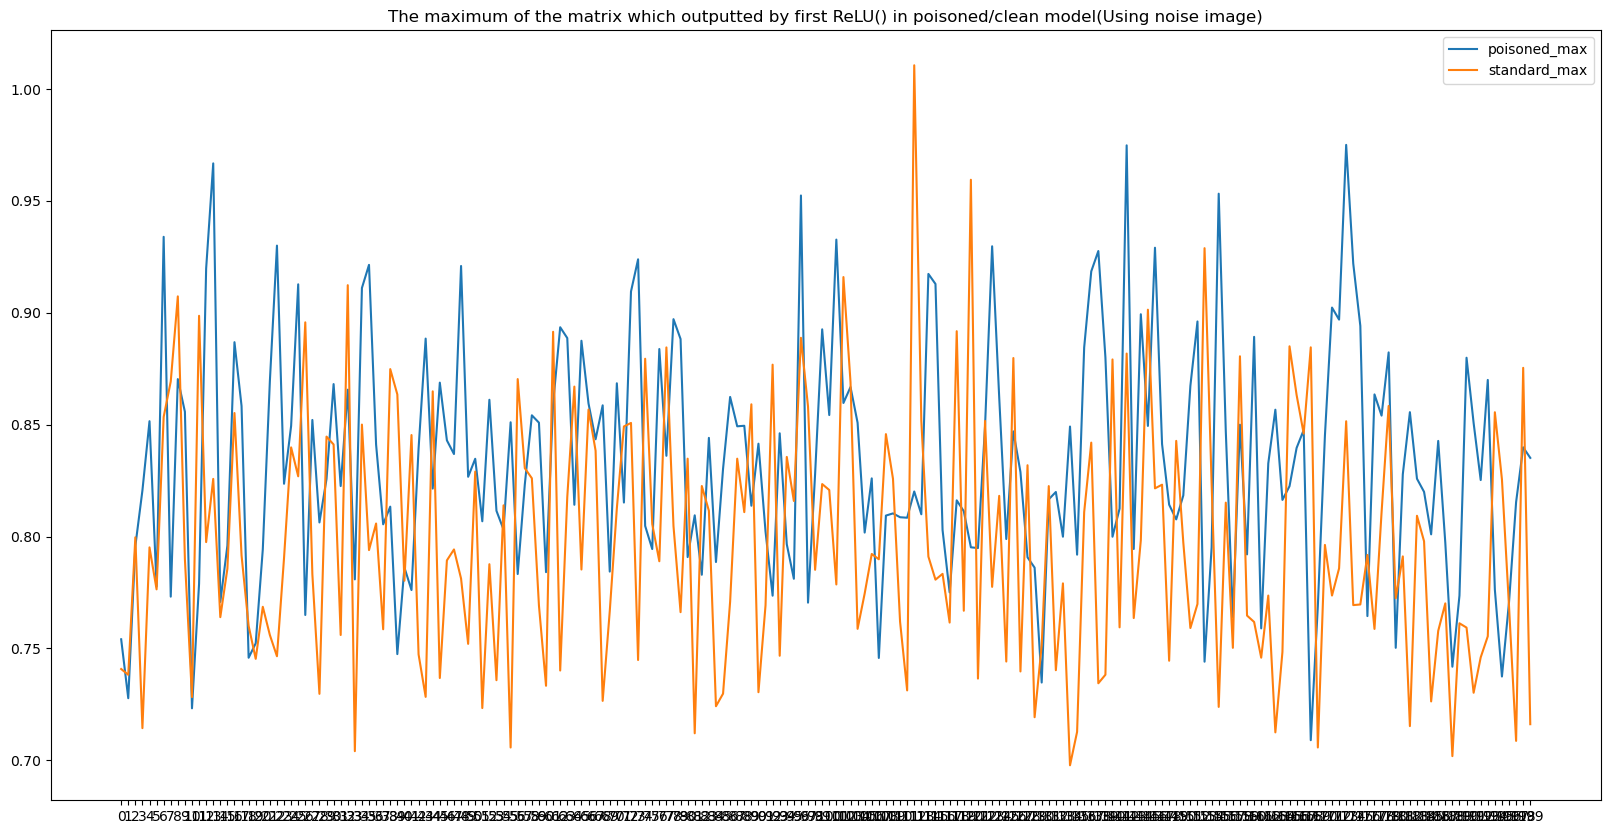

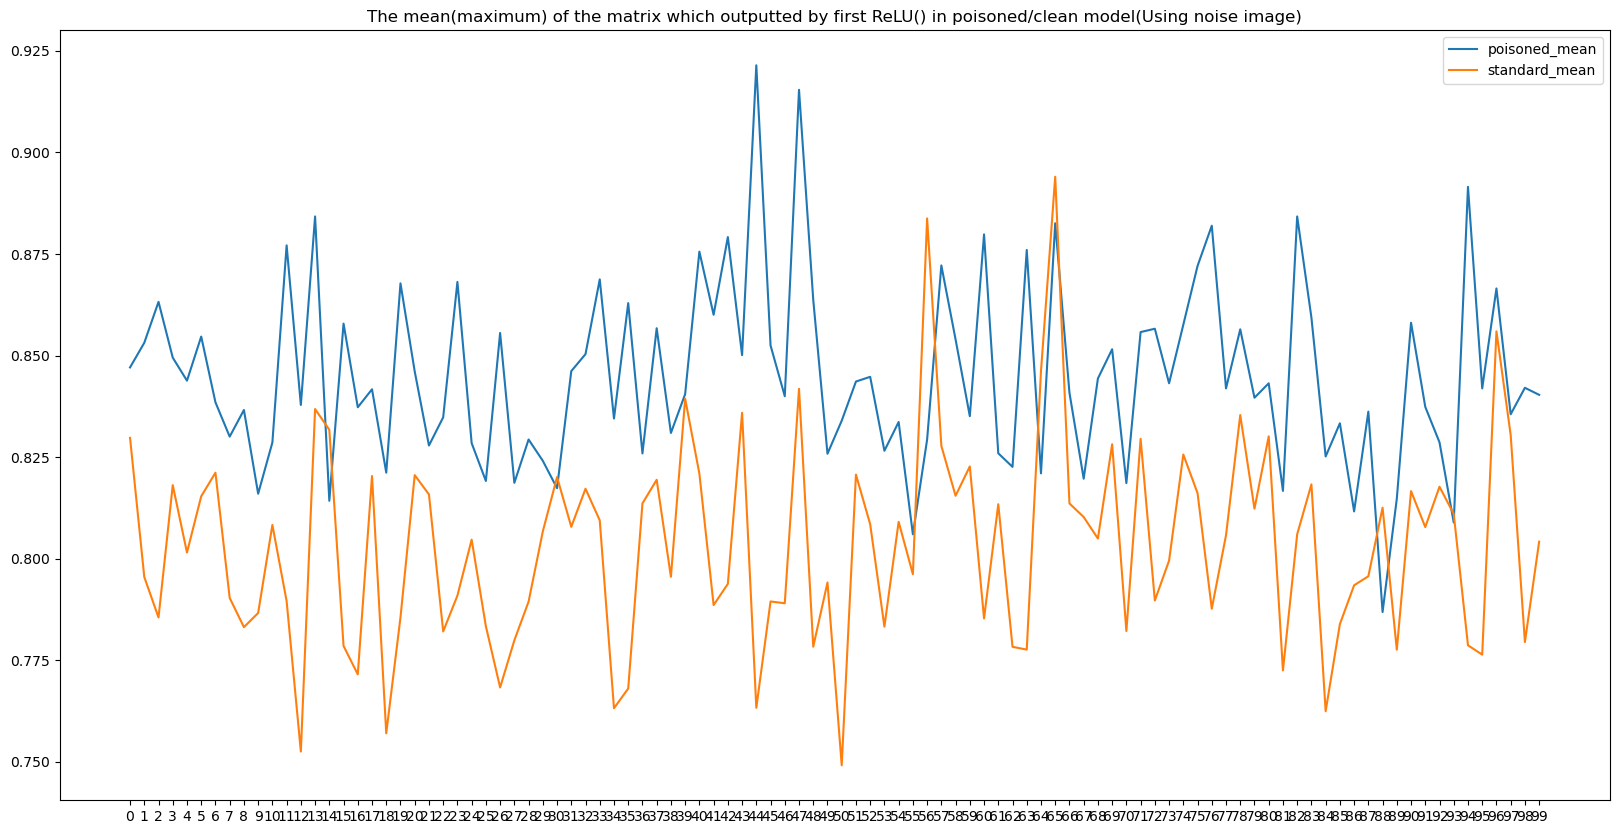

In [20]:
# MNIST Noise
maxList = []

handle = MNISTPoisonedModel.conv1[1].register_forward_hook(get_max_cov)
handle_standard = MNISTCleanModel.conv1[1].register_forward_hook(get_max_cov)
x = 0

for i, y in MNISTNoiseData:
    x += 1
    i = i.to(device)
    output = MNISTPoisonedModel(i)
    output_standard = MNISTCleanModel(i)
    if x >= 200:
        break

print(maxList)

label = np.arange(len(maxList)/2)
poisoned_max = []
standard_max = []
for a in range(len(maxList)):
    if a % 2 == 0:
        poisoned_max.append(maxList[a])
    else:
        standard_max.append(maxList[a])



plt.plot(label, poisoned_max, label="poisoned_max")
plt.plot(label, standard_max, label="standard_max")

plt.title("The maximum of the matrix which outputted by first ReLU() in poisoned/clean model(Using noise image)")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()
plt.show()

number_of_means = 100

poisoned_mean = []
standard_mean = []
for j in range(number_of_means):
    maxList = []
    x = 0
    for i, y in MNISTNoiseData:
        x += 1
        i = i.to(device)
        output = MNISTPoisonedModel(i)
        output_standard = MNISTCleanModel(i)
        if x >= 5:
            break
    label = np.arange(number_of_means)
    poisoned_max = []
    standard_max = []
    for a in range(len(maxList)):
        if a % 2 == 0:
            poisoned_max.append(maxList[a])
        else:
            standard_max.append(maxList[a])
    
    poisoned_mean.append(np.mean(poisoned_max))
    standard_mean.append(np.mean(standard_max))

handle.remove()
handle_standard.remove()

plt.plot(label, poisoned_mean, label="poisoned_mean")
plt.plot(label, standard_mean, label="standard_mean")


plt.title("The mean(maximum) of the matrix which outputted by first ReLU() in poisoned/clean model(Using noise image)")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()
plt.show()

# compare_list = []
# for i in range(len(poisoned_mean)):
#     if poisoned_mean[i] > standard_mean[i]:
#         compare_list.append(1)
#     else:
#         compare_list.append(0)

# stat = Counter(compare_list)

# plt.xticks([0, 1])
# plt.bar(stat.keys(), stat.values(), width=0.35)

# Summary

**For done part**</br>
$\qquad$-- The result is cool, and quit useful.</br>
$\qquad$-- Compare with last week, The differentiation no longer relies on test data.</br>

**For additional part**</br>
$\qquad$-- The generality of the result cannnot yet be determined.(Need more different models to test that)</br>

+++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++


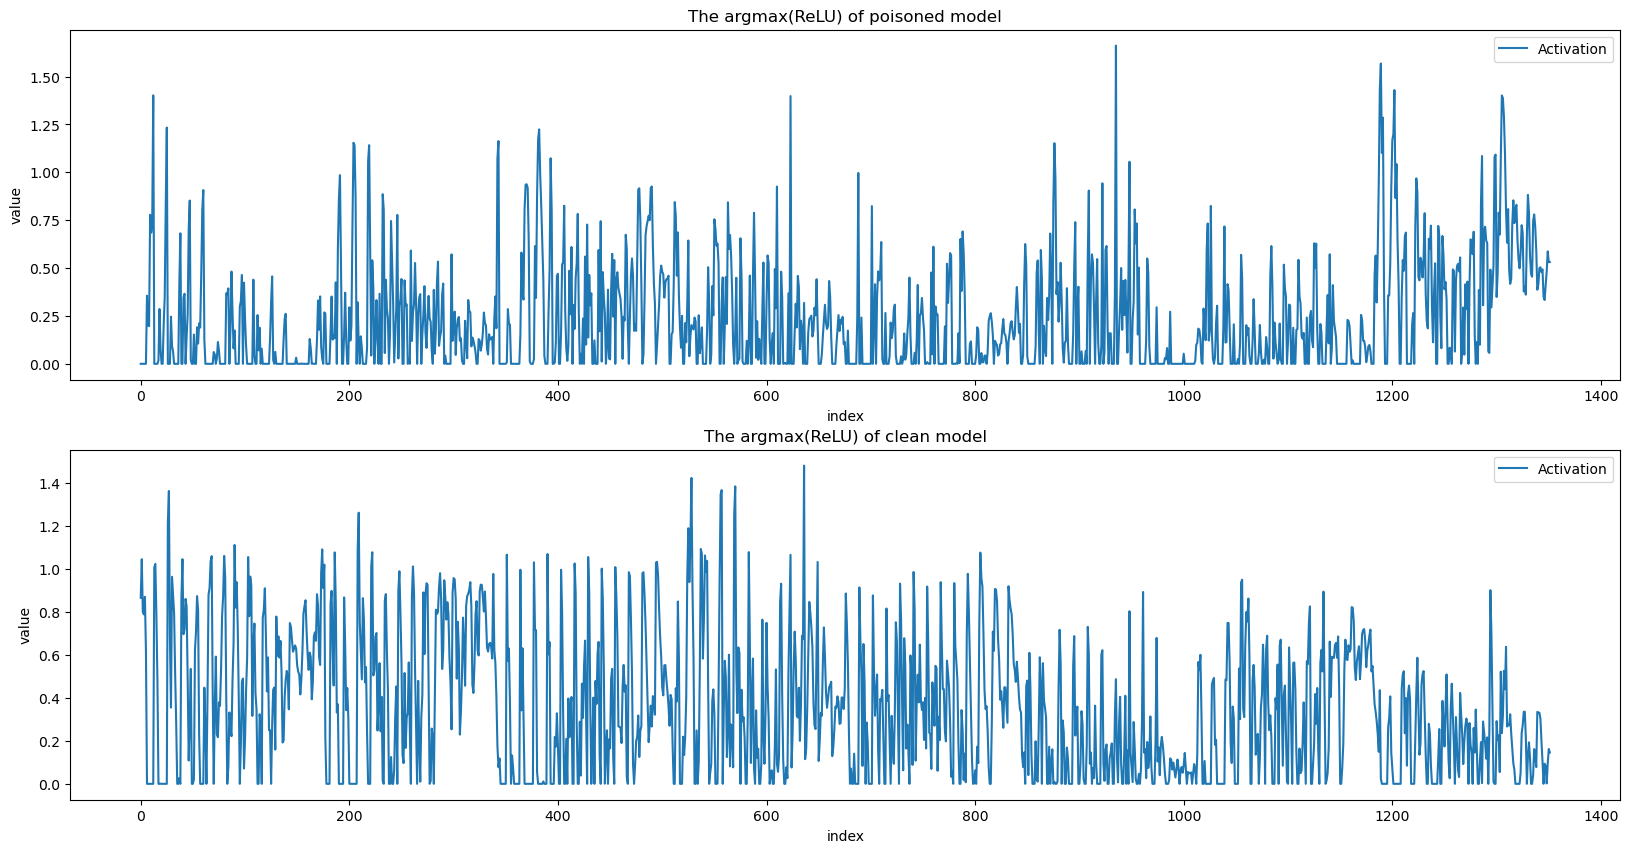

In [13]:
handle = GTSRBPoisonedModel.localization[2].register_forward_hook(activation_data_cov)
handle_standard = GTSRBCleanModel.localization[2].register_forward_hook(activation_data_cov)
x = 0

for i, y in GTSRBCleanData:
    x += 1
    i = i.to(device)
    output = GTSRBPoisonedModel(i)
    output_standard = GTSRBCleanModel(i)
    show_image()
    activationData = []
    if x >= 1:
        break
handle.remove()
handle_standard.remove()

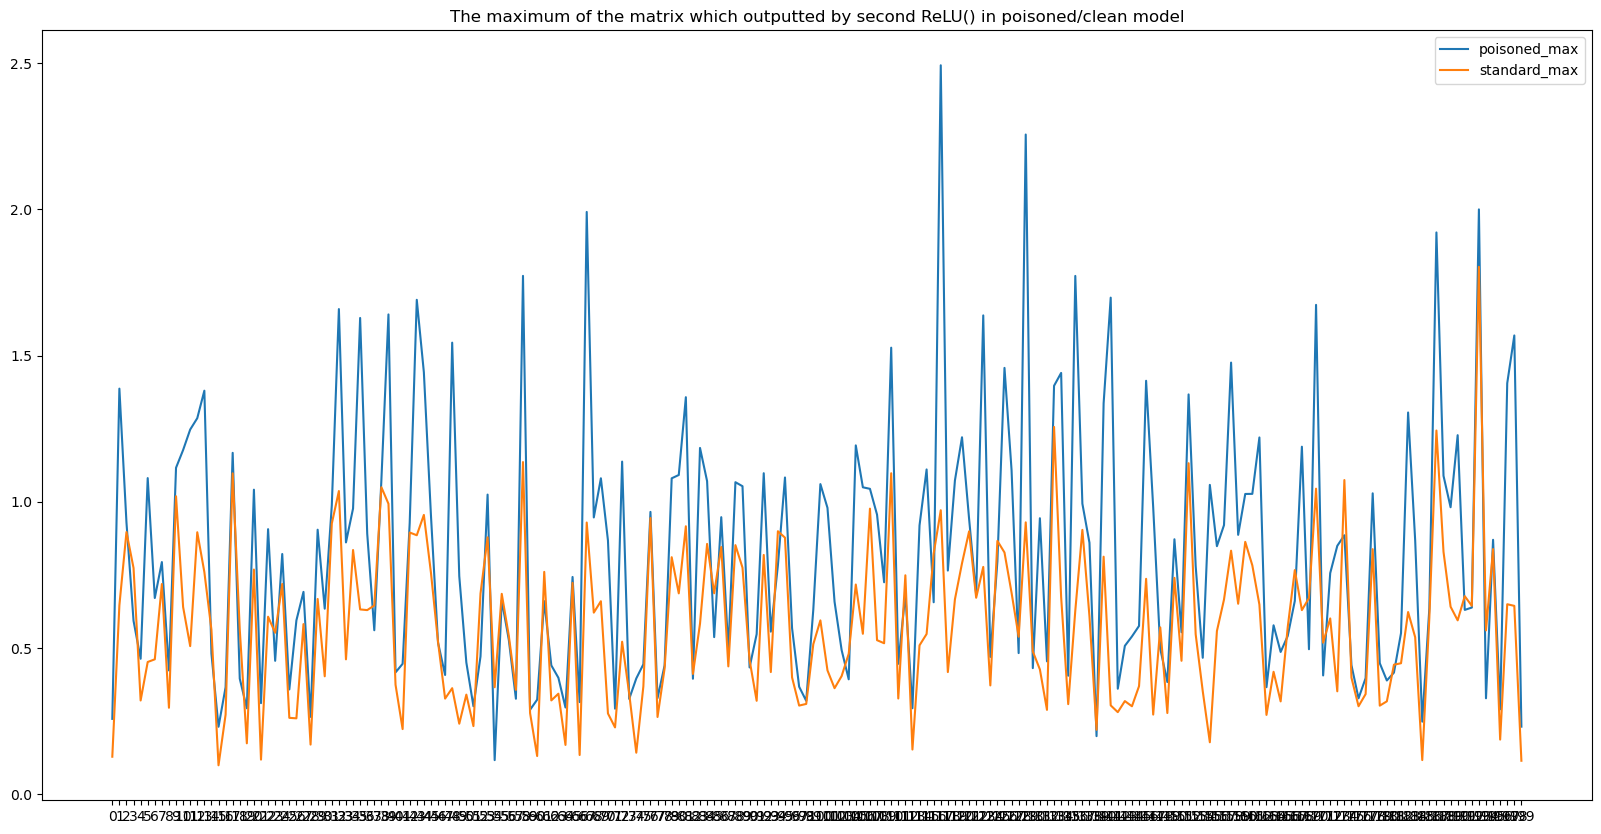

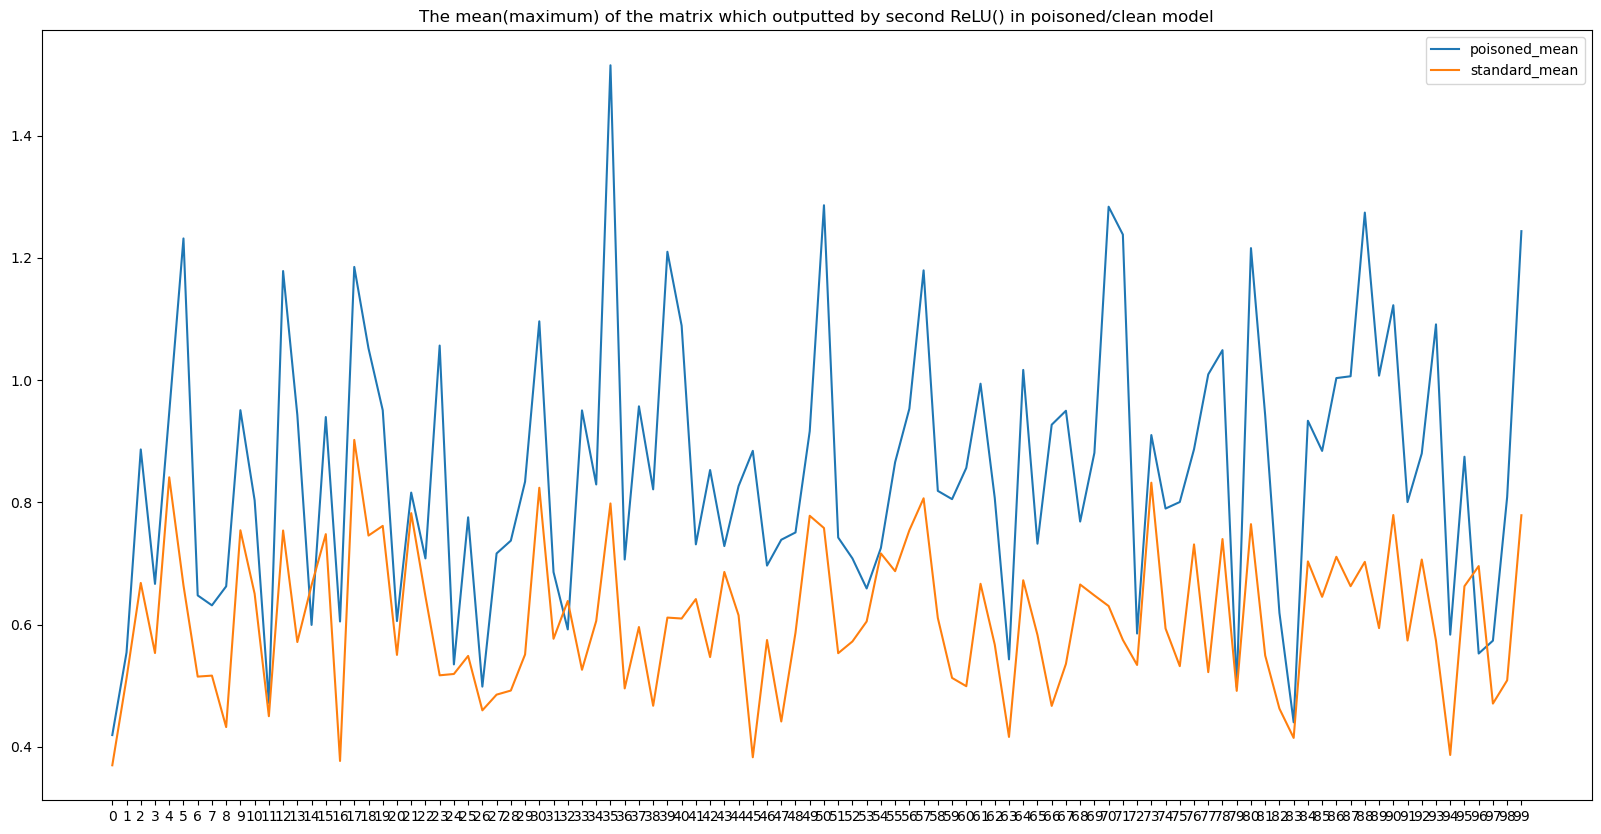

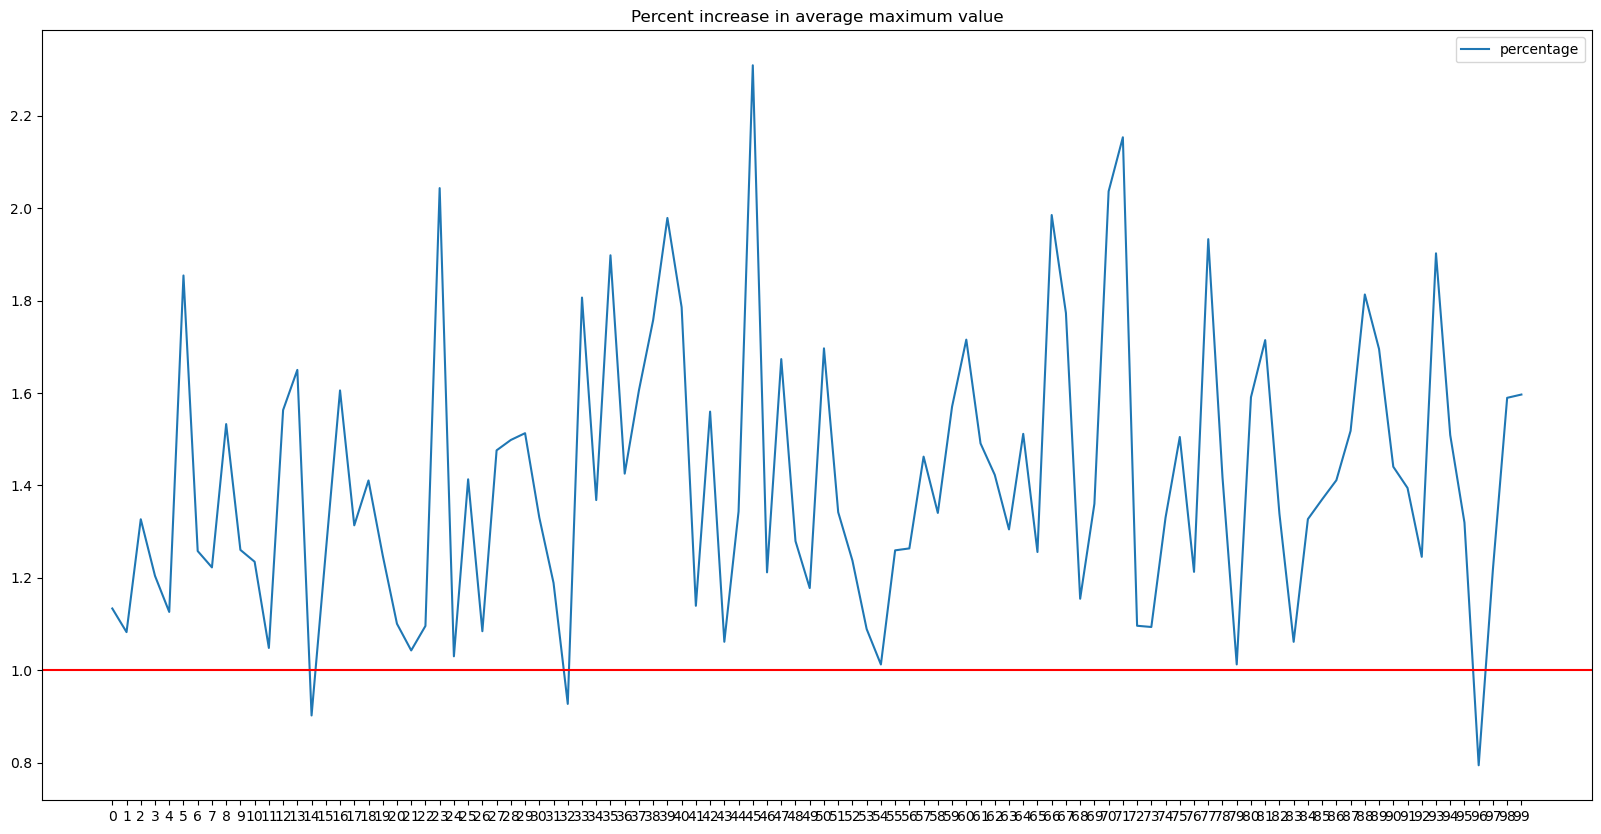

In [21]:
# GTSRB original test data
maxList = []

handle = GTSRBPoisonedModel.localization[5].register_forward_hook(get_max_cov)
handle_standard = GTSRBCleanModel.localization[5].register_forward_hook(get_max_cov)
x = 0

for i, y in GTSRBCleanData:
    x += 1
    i = i.to(device)
    output = GTSRBPoisonedModel(i)
    output_standard = GTSRBCleanModel(i)
    if x >= 200:
        break

label = np.arange(len(maxList)/2)
poisoned_max = []
standard_max = []
for a in range(len(maxList)):
    if a % 2 == 0:
        poisoned_max.append(maxList[a])
    else:
        standard_max.append(maxList[a])


plt.plot(label, poisoned_max, label="poisoned_max")
plt.plot(label, standard_max, label="standard_max")

plt.title("The maximum of the matrix which outputted by second ReLU() in poisoned/clean model")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()
plt.show()


#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

number_of_means = 100

poisoned_mean = []
standard_mean = []
for j in range(number_of_means):
    maxList = []
    x = 0
    for i, y in GTSRBCleanData:
        x += 1
        i = i.to(device)
        output = GTSRBPoisonedModel(i)
        output_standard = GTSRBCleanModel(i)
        if x >= 5:
            break
    label = np.arange(number_of_means)
    poisoned_max = []
    standard_max = []
    for a in range(len(maxList)):
        if a % 2 == 0:
            poisoned_max.append(maxList[a])
        else:
            standard_max.append(maxList[a])
    
    poisoned_mean.append(np.mean(poisoned_max))
    standard_mean.append(np.mean(standard_max))

handle.remove()
handle_standard.remove()

plt.plot(label, poisoned_mean, label="poisoned_mean")
plt.plot(label, standard_mean, label="standard_mean")


plt.title("The mean(maximum) of the matrix which outputted by second ReLU() in poisoned/clean model")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()
plt.show()

percentage = []

for i in range(len(poisoned_mean)):
    percentage.append(poisoned_mean[i]/standard_mean[i])

plt.plot(label, percentage, label="percentage")
plt.axhline(y=1, color='r', linestyle='-')
plt.title("Percent increase in average maximum value")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()

[0.7615986, 0.46702012, 0.95929056, 0.509732, 0.9476591, 0.48332435, 0.5954969, 0.52760345, 0.5581015, 0.6793449, 0.7490225, 0.66911834, 0.62597007, 0.5850583, 0.81163734, 0.4964813, 0.6951769, 0.47198164, 0.6864208, 0.46811828, 0.6032128, 0.55201685, 0.8521088, 0.6540592, 0.65934026, 0.5184551, 1.0514259, 0.5261883, 0.69375813, 0.60379356, 0.82547665, 0.4970701, 0.5406933, 0.6599652, 0.9357273, 0.83922553, 0.7218057, 0.5734043, 0.7781649, 0.6114158, 0.9322089, 0.39055154, 0.86785984, 0.73663086, 0.9796761, 0.42006555, 0.9398719, 0.66934973, 0.5277448, 0.4883404, 0.62627393, 0.5583166, 0.8344074, 0.6126678, 0.5604889, 0.41842604, 0.7377121, 0.41395393, 0.47168243, 0.58596975, 0.7473747, 0.48361507, 0.9754303, 0.51175535, 0.8412622, 0.8322706, 0.56790054, 0.46432167, 0.8000088, 0.5484265, 0.7521958, 0.65306467, 0.5315212, 0.48408365, 0.72727996, 0.4869505, 0.8581851, 0.3897701, 0.7872625, 0.5224881, 0.6252245, 0.5073159, 0.7058204, 0.6152415, 0.7990097, 0.40937594, 0.53040725, 0.5815889

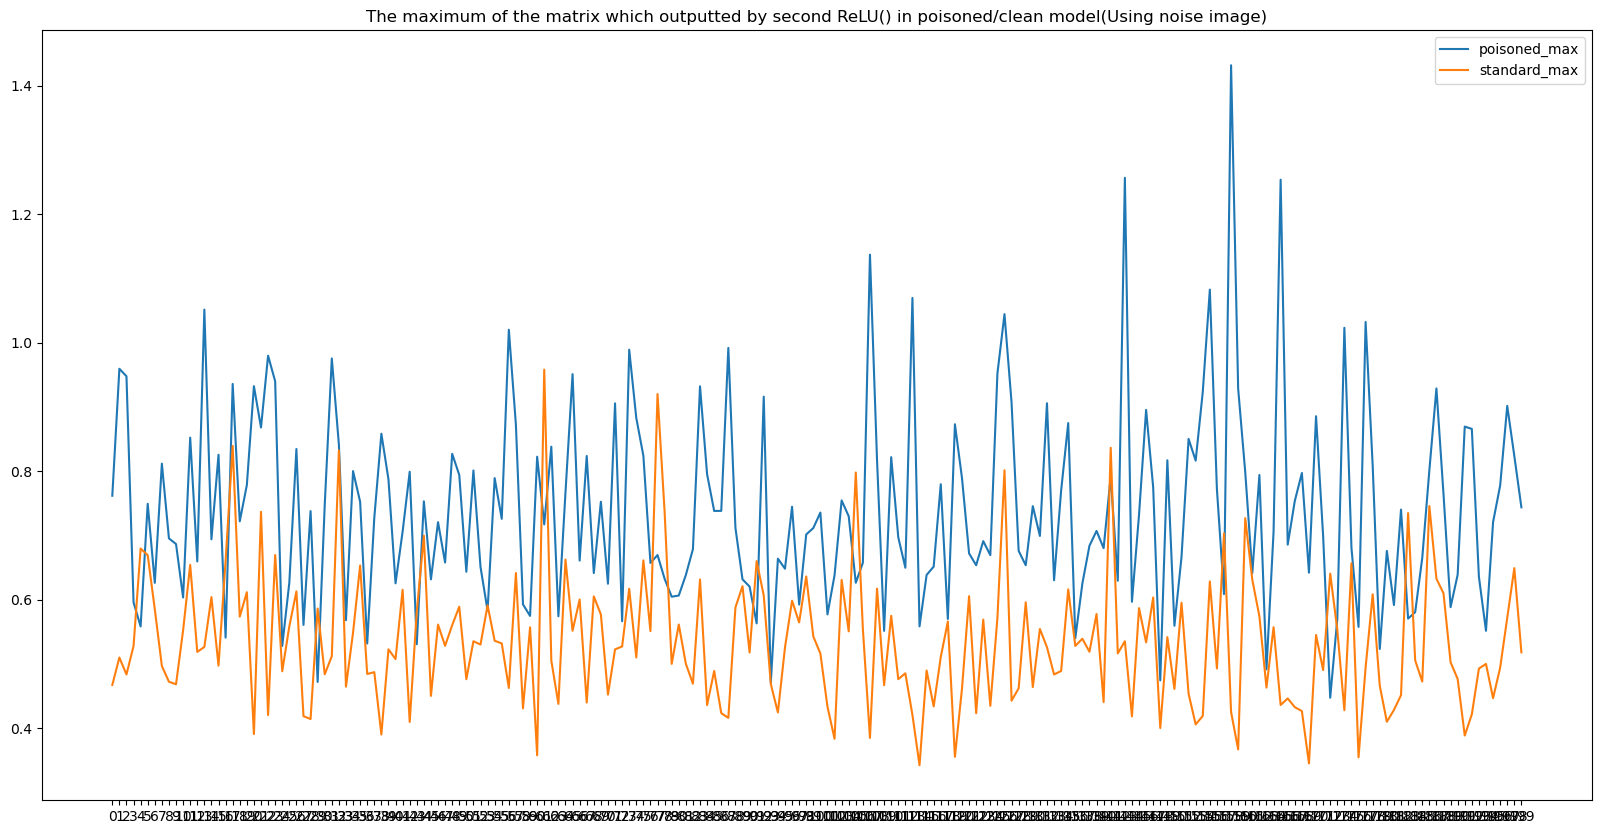

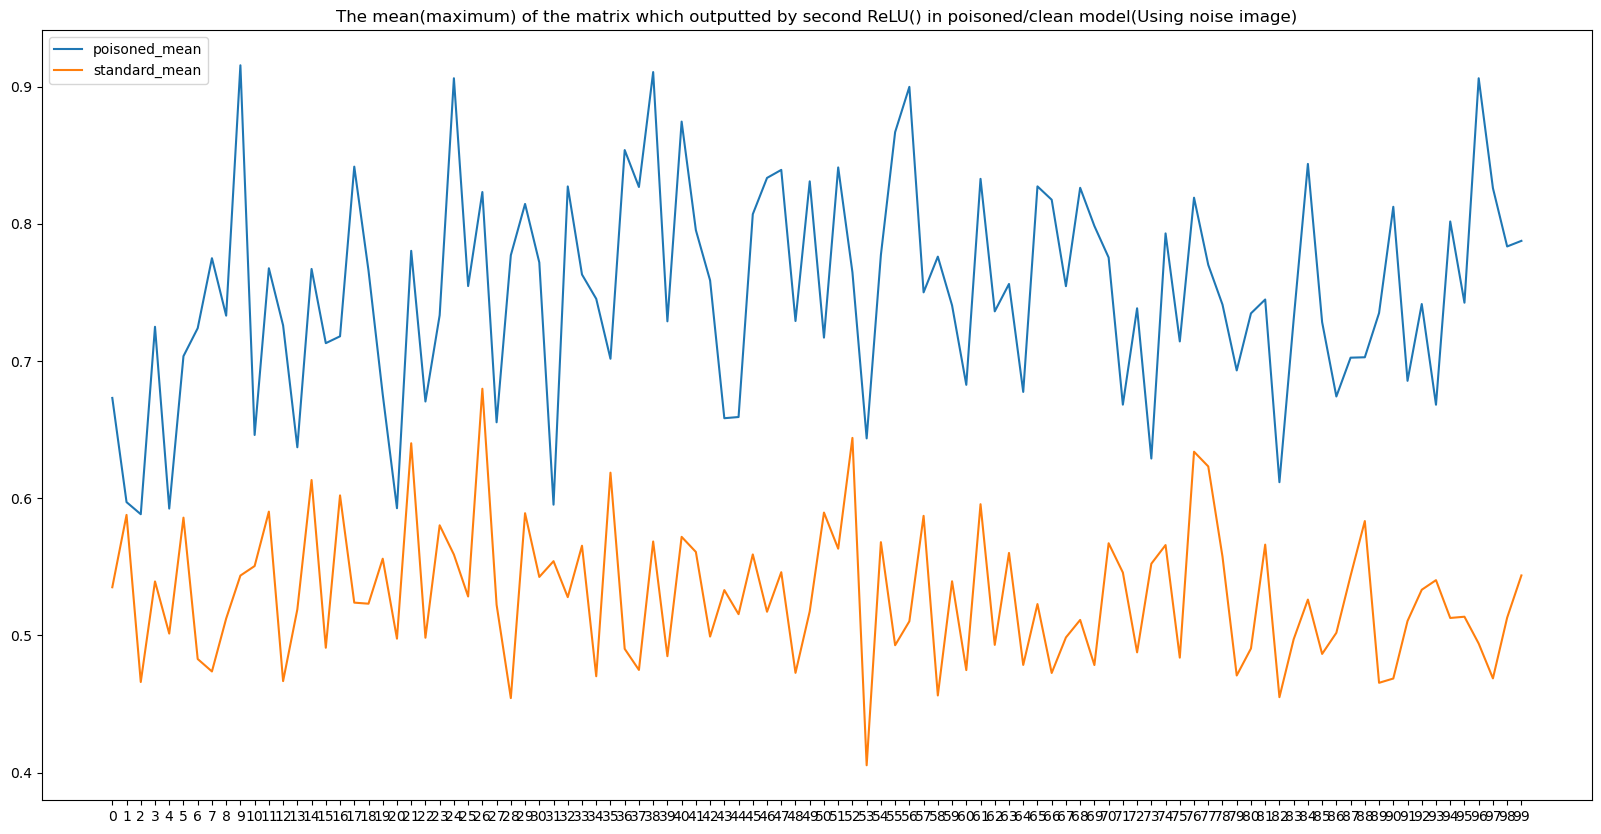

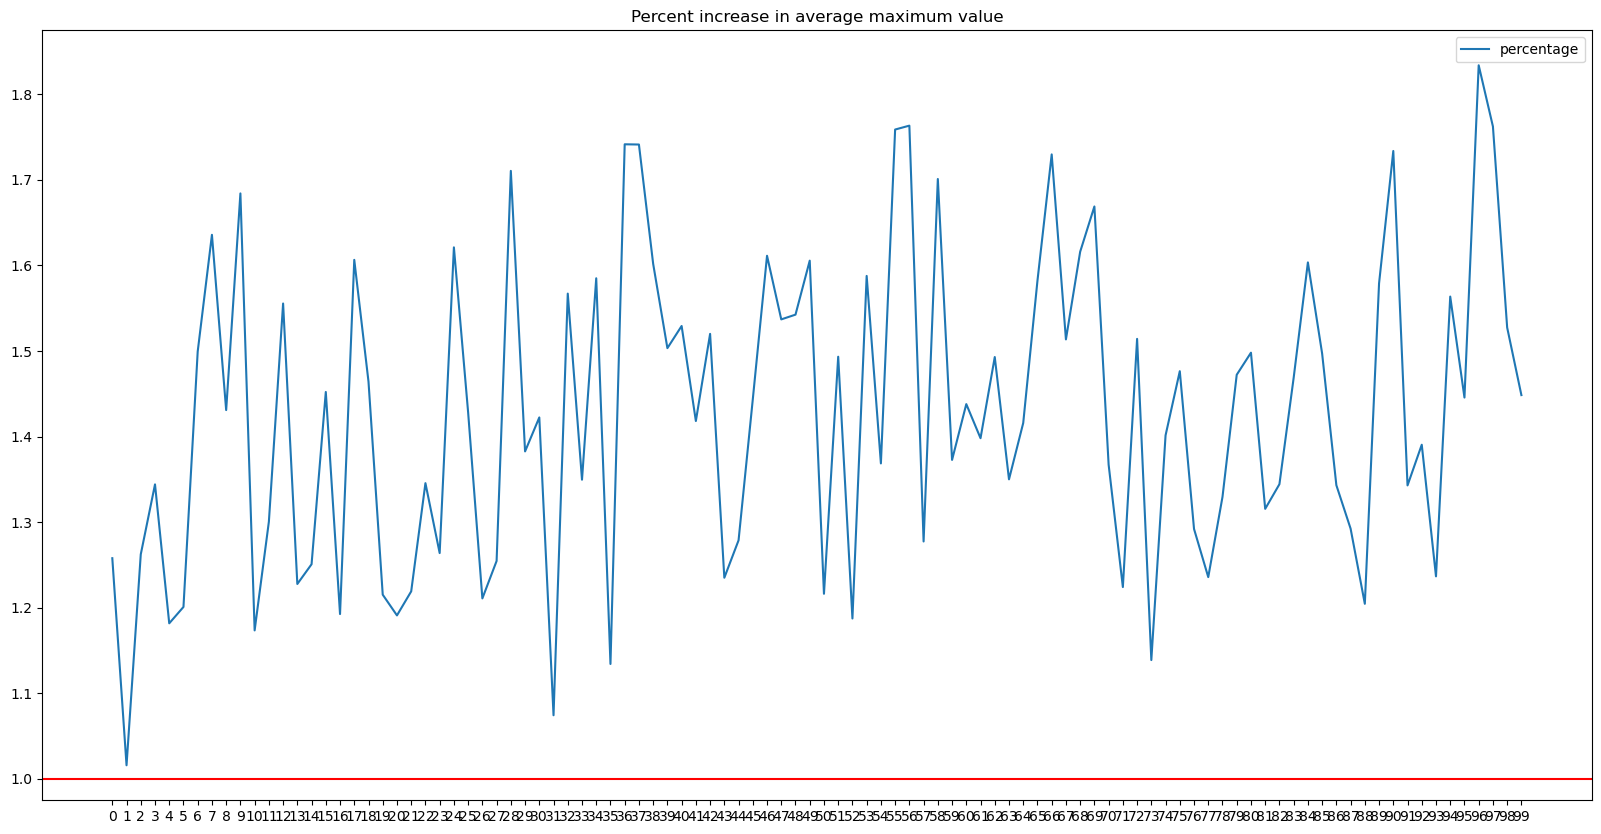

In [22]:
# GTSRB Noise
maxList = []

handle = GTSRBPoisonedModel.localization[5].register_forward_hook(get_max_cov)
handle_standard = GTSRBCleanModel.localization[5].register_forward_hook(get_max_cov)
x = 0

for i, j in GTSRBNoiseData:
    x += 1
    i = i.to(device)
    output = GTSRBPoisonedModel(i)
    output_standard = GTSRBCleanModel(i)
    if x >= 200:
        break

print(maxList)

label = np.arange(len(maxList)/2)
poisoned_max = []
standard_max = []
for a in range(len(maxList)):
    if a % 2 == 0:
        poisoned_max.append(maxList[a])
    else:
        standard_max.append(maxList[a])



plt.plot(label, poisoned_max, label="poisoned_max")
plt.plot(label, standard_max, label="standard_max")

plt.title("The maximum of the matrix which outputted by second ReLU() in poisoned/clean model(Using noise image)")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()
plt.show()

number_of_means = 100

poisoned_mean = []
standard_mean = []
for j in range(number_of_means):
    maxList = []
    x = 0
    for i, y in GTSRBNoiseData:
        x += 1
        i = i.to(device)
        output = GTSRBPoisonedModel(i)
        output_standard = GTSRBCleanModel(i)
        if x >= 5:
            break
    label = np.arange(number_of_means)
    poisoned_max = []
    standard_max = []
    for a in range(len(maxList)):
        if a % 2 == 0:
            poisoned_max.append(maxList[a])
        else:
            standard_max.append(maxList[a])
    
    poisoned_mean.append(np.mean(poisoned_max))
    standard_mean.append(np.mean(standard_max))

handle.remove()
handle_standard.remove()

plt.plot(label, poisoned_mean, label="poisoned_mean")
plt.plot(label, standard_mean, label="standard_mean")


plt.title("The mean(maximum) of the matrix which outputted by second ReLU() in poisoned/clean model(Using noise image)")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()
plt.show()

percentage = []

for i in range(len(poisoned_mean)):
    percentage.append(poisoned_mean[i]/standard_mean[i])

plt.plot(label, percentage, label="percentage")
plt.axhline(y=1, color='r', linestyle='-')
plt.title("Percent increase in average maximum value")
plt.xticks(label)
plt.rcParams["figure.figsize"] = (20, 10)
plt.legend()